<a href="https://colab.research.google.com/github/SinothileB/Prediction-of-Product-Sales/blob/main/Markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales







 - Author:Sinothile Blose

##Project Overview



## Load and Inspect Data


In [ ]:
#
import pandas as pd
fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df =pd.read_csv(fpath)
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Clean Data

In [ ]:
#1) How many rows and columns?
df.shape


(8523, 12)

In [ ]:
#2) What are the datatypes of each variable?
df.select_dtypes("object")



,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [ ]:
df.select_dtypes("number")

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [ ]:
#2 Are there duplicates? If so, drop any duplicates.
duplicated_rows = df.duplicated()
# Get the sum of duplicated_rows filter to see the number of duplicate rows
Dup_sum = duplicated_rows.sum()
Dup_sum


0

In [ ]:
#4) Identify missing values.
all_nulls = df.isna()
sum_nulls = all_nulls.sum()
sum_nulls


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [ ]:
#5) Address the missing values by using a placeholder value.
cat_n = df.select_dtypes("number").columns
cat_n



Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
# use the list of num columns to fill null values with -1
df[cat_n] = df[cat_n].fillna(-1)


In [ ]:
cat_o = df.select_dtypes("object").columns
cat_o


Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
df[cat_o] = df[cat_o].fillna("MISSING")

<Axes: >

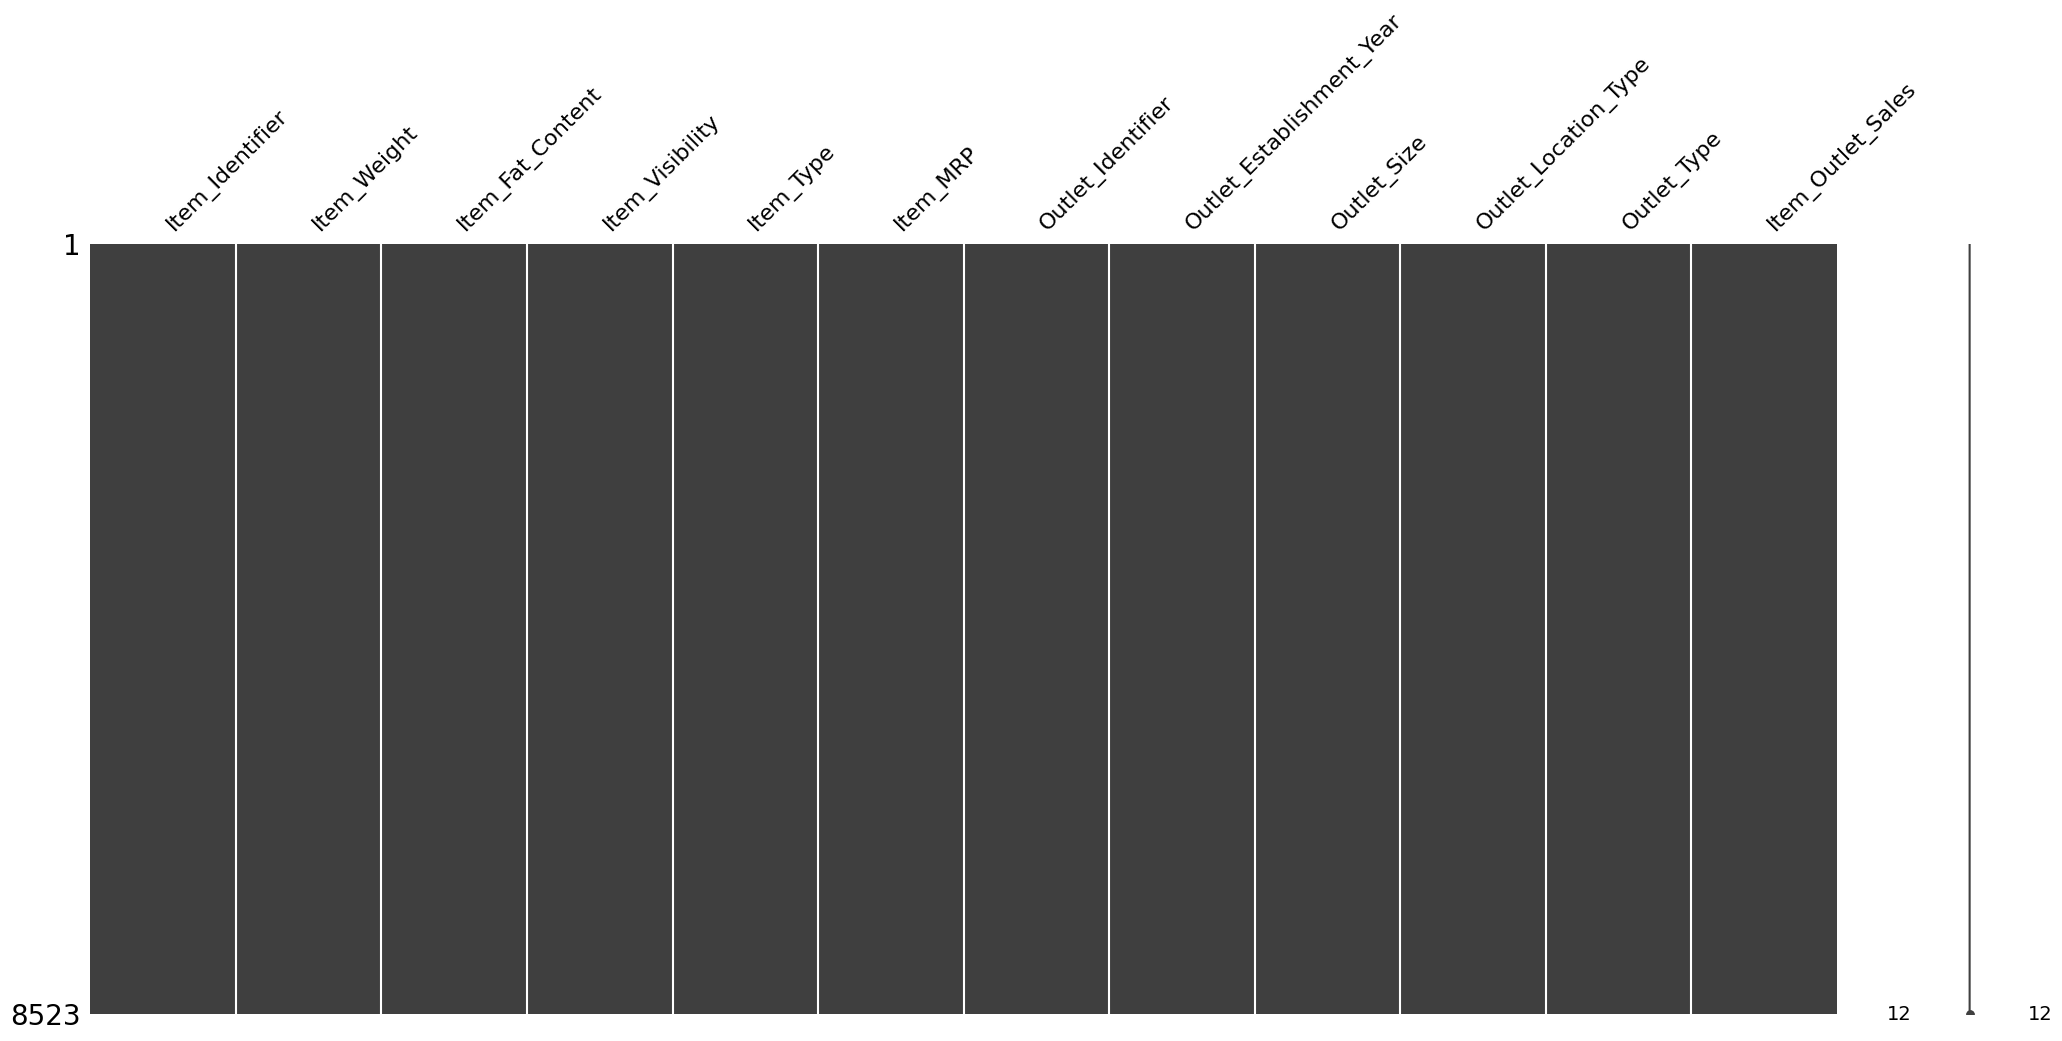

In [ ]:
# Confirm no more nulls using using missingno
import missingno as msno
msno.matrix(df)

In [ ]:
#Find and fix any inconsistent categories of data
# loop through the list of string columns
for col in cat_o:

  # print the value counts for the column
  print(f"Value Counts for {col}")
  print(df[col].value_counts())

  # Print an empty line for readability
  print('\n')


Value Counts for Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


Value Counts for Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


Value Counts for Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


Value Counts for Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930


In [ ]:
#Need to fix Value Counts for Item_Fat_Content

df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("Low Fat","low fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("LF","low fat")
df["Item_Fat_Content"] = df["Item_Fat_Content"].str.replace("reg","Regular")
# Check the value counts again to confirm
df["Item_Fat_Content"].value_counts()




low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
#Obtain the stats for numerical columns
import numpy as np

df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fpath = "/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv"
df =pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


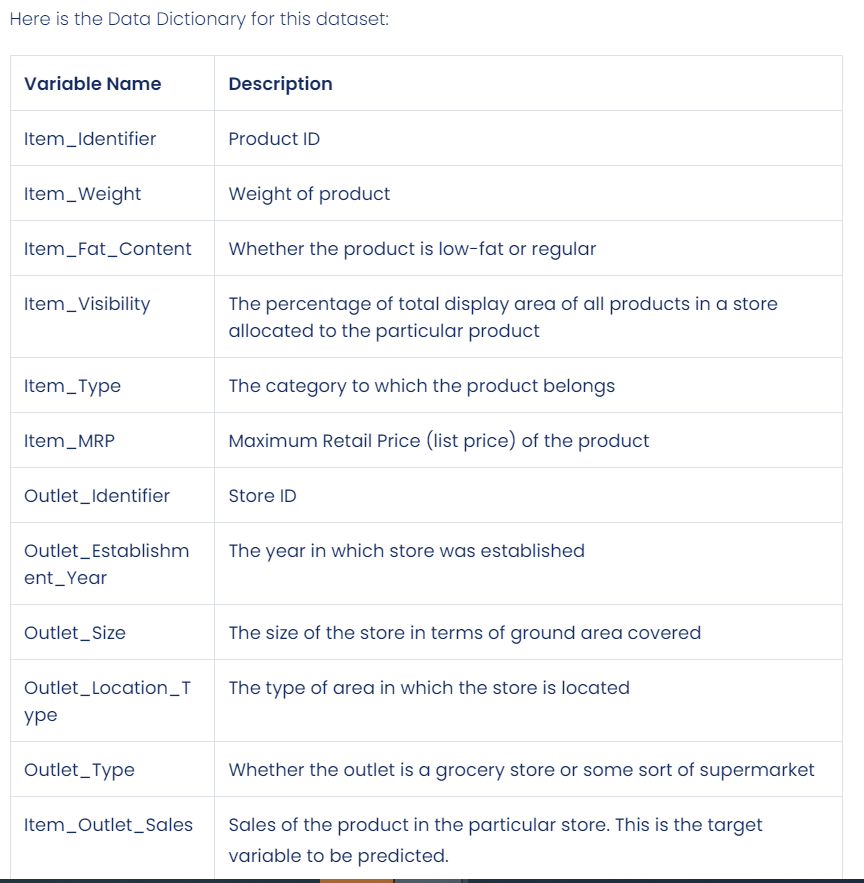

Text(0.5, 1.0, "Distributiopn of Item's weight")

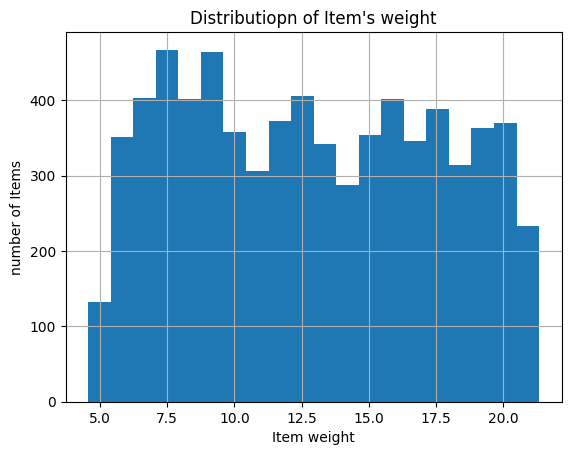

In [ ]:
#Histograms to view the distributions of the product weight
#Used auto for a more detailed
ax = df['Item_Weight'].hist(bins ='auto')
ax.set_xlabel ('Item weight')
ax.set_ylabel('number of Items')
ax.set_title("Distributiopn of Item's weight")


In [ ]:
#From the above we can see that the items that are found the most are the ones that weigh between 7 and 10

Text(0.5, 1.0, "Item's_Maximum retail price ")

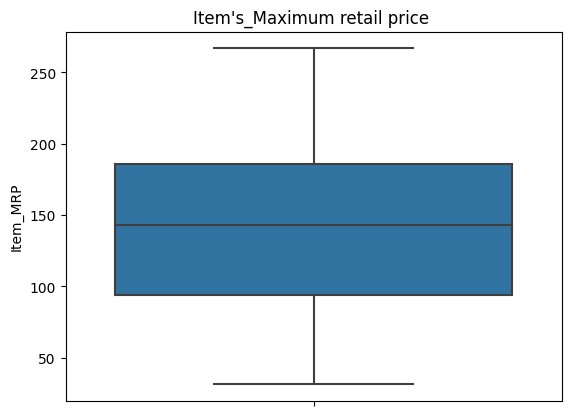

In [ ]:
#Boxplots to view statistical summaries of numerical features in your dataset.
# Create a boxplot of sItem_MRP'
ax=sns.boxplot(data =df, y='Item_MRP')
ax.set_title("Item's_Maximum retail price ")


In [ ]:
#The are no outliers for the product retail price

Text(0.5, 1.0, 'Item_Outlet_Sales ')

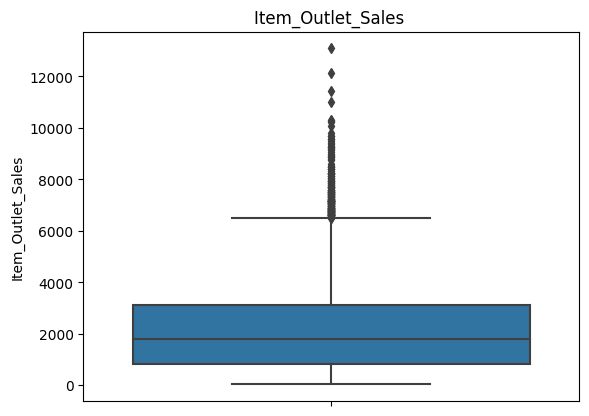

In [ ]:
# Create a boxplot of Item_Outlet_Sales
ax=sns.boxplot(data =df, y='Item_Outlet_Sales')
ax.set_title("Item_Outlet_Sales ")


In [ ]:
#The are some  outliers on the item-outlet_sales

In [ ]:
#Countplots to view the frequency of each class of categorial features in your dataset.

Text(0.5, 1.0, 'frequency of each item type')

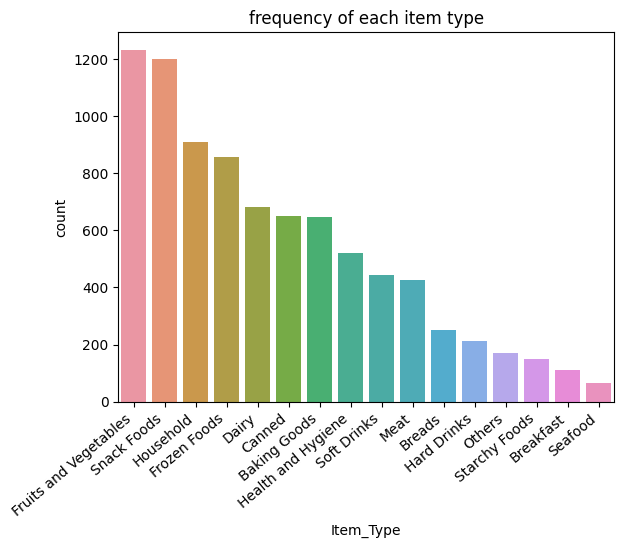

In [ ]:
val_counts = df['Item_Type'].value_counts()
ax=sns.countplot(data = df,x='Item_Type' ,order=val_counts.index) #Order by cout to make it easier
ax.set_xticklabels(ax.get_xticklabels(), rotation=40 ,ha='right')
ax.set_title("frequency of each item type")

In [ ]:
#Most Items selling in store are fruit and vegetables

Text(0.5, 1.0, 'correlation between features')

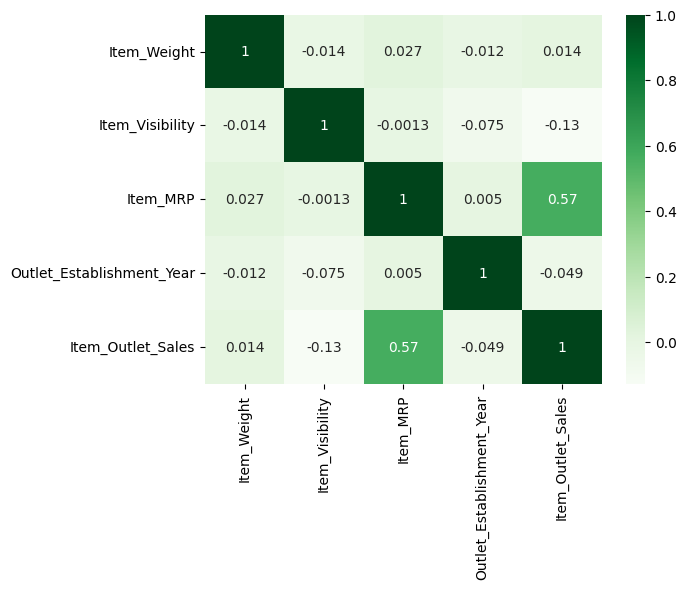

In [ ]:
#Heatmap to view the correlation between features.
# Get correlations
corr = df.corr(numeric_only = True)
sns.heatmap(corr, cmap = 'Greens', annot = True);


In [ ]:
#Item maximum retail price and Item outlet sales have a strong positive correlation


Text(0.5, 1.0, 'Item_MRP vs Item_Outlet_Sales')

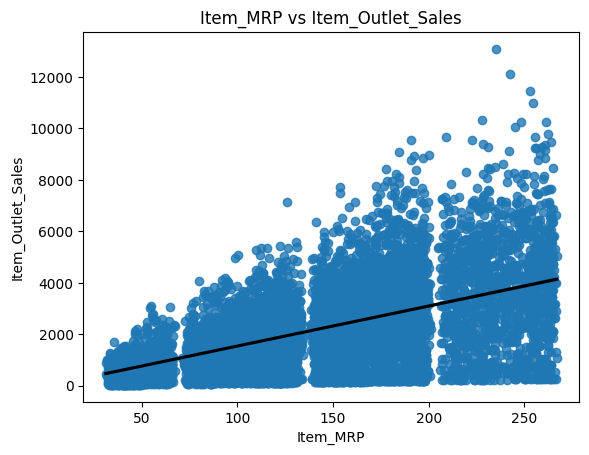

In [ ]:
# Create a regplot for the item_MRP vs Item_OutleT_Sales
line_kws = dict(color='black')
ax = sns.regplot(data=df, x="Item_MRP", y="Item_Outlet_Sales",line_kws=line_kws);
ax.set_title("Item_MRP vs Item_Outlet_Sales")

In [ ]:
#As the item sales increases the item retail price increase as well

Text(0.5, 1.0, 'Item_MRP vs Item_Visibility')

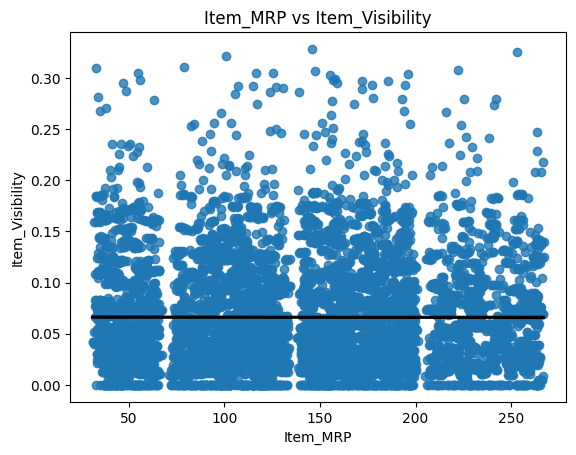

In [ ]:
# Create a regplot for the item_MRP vs Item_Visibility
line_kws = dict(color='black')
ax = sns.regplot(data=df, x="Item_MRP", y="Item_Visibility",line_kws=line_kws);
ax.set_title("Item_MRP vs Item_Visibility")

In [ ]:
#Item_Visibilty and Item maximum retail price have no correlation